In [6]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from scipy import stats

#plt.rcParams["figure.figsize"] = (15,10)

In [7]:
muminus_single = uproot.open("processed_single_muminus.root")
muminus_10 = uproot.open("processed_10_muminus.root")
muminus_100 = uproot.open("processed_100_muminus.root")
#muminus_500k = uproot.open("../MC_pilot_data/500k_muminus.root")

# pilot data that has been sliced to a 3x3(mm)^2 area
# (xmin,xmax) = (ymin,ymax) = (47.5,50.5)mm
pilot_sliced = uproot.open("sliced_pilot_data.root")


    

In [8]:
# funtion to get any tree from MC simulation.
# currently, there are 3 MC samples
# data can be 1 for single muon
# 10 for 10 muons, and 100 for 100 muons
def tree_MC(data,N):
    index='tree'+ str(N)
    if data == 1:
        return muminus_single[index]
    elif data == 10:
        return muminus_10[index]
    elif data == 100:
        return muminus_100[index]
    else:
        print("wrong input for data")
        

def tree_pilot_data(N):
    index = index='tree'+ str(N)
    return pilot_sliced[index]

In [9]:
# this function is used to compare ty and tx of both datasets.
# There are normalized to one and overlaped in a single figure
# one figure is produced for ever plate [90,118] in the specifed folder
def tx_ty_compare(data,branch,N):
    # extract data
    tree_mc = tree_MC(data,N)[branch].array()
    tree_pilot = tree_pilot_data(N)[branch].array()
    
    # computing the bin properties (same for both distributions)
    num_bin = 100
    bin_lims = np.linspace(-1,1,num_bin+1)
    bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
    bin_widths = bin_lims[1:]-bin_lims[:-1]
    
    # normalize MC & data to 1
    mc, _ = np.histogram(np.array(tree_mc), bins=bin_lims)
    pilot, _ = np.histogram(np.array(tree_pilot), bins=bin_lims)
    mc_norm = mc/np.max(mc)
    pilot_norm = pilot/np.max(pilot)
    
    # make plots
    fig = plt.figure(figsize=(10,8))
    
    # mc & pilot data imposed in a single plot
    ax = fig.add_gridspec(3,3)
    ax1 = fig.add_subplot(ax[0:2, 0:3])
    ax1.bar(bin_centers, mc_norm, width = bin_widths, align = 'center',label='MC Simulation ')
    ax1.bar(bin_centers, pilot_norm, width = bin_widths,alpha=0.5, align = 'center',label='Pilot Run Data')
    ax1.legend(fontsize=10)
    ax1.set_title(str(branch) +' probability distribution (tree' + str(N) +')',size=15)
    ax1.set_ylabel('probability',size=15)
    
    # ratio of mc/pilot
    ax2 = fig.add_subplot(ax[2, 0:3])
    ax2.plot(bin_centers,mc_norm/pilot_norm,color='gray')
    ax2.set_ylabel('$\dfrac{mc}{pilot}$',size=10)
    ax2.set_xlabel(branch,size=15)
    
    #file_name = branch+'/'+branch+'_tree'+str(N)+'.png'
    #plt.savefig(file_name,bbox_inches='tight',facecolor='w')
    plt.show()

<ipython-input-9-318f7f435607>:35: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(bin_centers,mc_norm/pilot_norm,color='gray')


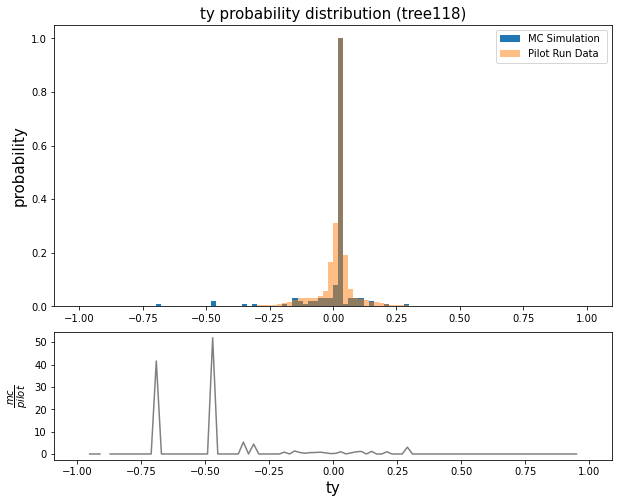

In [10]:
tx_ty_compare(100,'ty',118)